## Libraries

In [7]:
import os 
import shutil

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

***
## Setup and Data Organization

Originally all of the data comes with a ton of folders which also have two folders each one, 0 and 1, and what i need is not have all of the images in different directories, i need all of them in only two locations, so what i did is create a new folder (bcd) and relocate all of the image to their respective folders (0 if haven't breast cancer, or 1 if have)

<img src='./img/data_origin.png' width=500>
<img src='./img/data_origin_classes.png' width=500>

In [8]:
path = './breast_data/' ## Where the data is
data = './bcd/' ## Where i want to send them

In [9]:
for folder in os.listdir(path): # a for to go for each directory in the path 
  print(f"{os.path.join(path,folder)}") # I print it
  for classes in os.listdir(os.path.join(path,folder)): # then i just do the same for the folders to access the image folders
    for image in os.listdir(f"{os.path.join(path,folder)}/{classes}"): # the same to access each image in folders
      shutil.move(f"{os.path.join(path,folder)}/{classes}/{image}",f"./{data}/{classes}") # Change the origin path of the image to the data path 

./breast_data/10253
./breast_data/10254
./breast_data/10255
./breast_data/10256
./breast_data/10257
./breast_data/10258
./breast_data/10259
./breast_data/10260
./breast_data/10261
./breast_data/10262
./breast_data/10264
./breast_data/10268
./breast_data/10269
./breast_data/10272
./breast_data/10273
./breast_data/10274
./breast_data/10275
./breast_data/10276
./breast_data/10277
./breast_data/10278
./breast_data/10279
./breast_data/10282
./breast_data/10285
./breast_data/10286
./breast_data/10288
./breast_data/10290
./breast_data/10291
./breast_data/10292
./breast_data/10293
./breast_data/10295
./breast_data/10299
./breast_data/10300
./breast_data/10301
./breast_data/10302
./breast_data/10303
./breast_data/10304
./breast_data/10305
./breast_data/10306
./breast_data/10307
./breast_data/10308
./breast_data/12241
./breast_data/12242
./breast_data/12626
./breast_data/12748
./breast_data/12749
./breast_data/12750
./breast_data/12751
./breast_data/12752
./breast_data/12810
./breast_data/12811


***
## Pre-procesing

now, what we going to do is create a input pipeline to preprocces the data for the future model:

In [10]:
dataset = tf.keras.utils.image_dataset_from_directory(data)

Found 276639 files belonging to 2 classes.


this by default performs a series of change to our images, besides to  split them according their labels or classes.

In [11]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [12]:
## To be able to see the batches that our pipeline create.
breast_data = dataset.as_numpy_iterator() 
batch = breast_data.next()

In [13]:
## a look at one of the batches
batch

(array([[[[182., 117., 162.],
          [182., 117., 162.],
          [182., 117., 162.],
          ...,
          [194., 119., 167.],
          [194., 119., 167.],
          [194., 119., 167.]],
 
         [[182., 117., 162.],
          [182., 117., 162.],
          [182., 117., 162.],
          ...,
          [194., 119., 167.],
          [194., 119., 167.],
          [194., 119., 167.]],
 
         [[182., 117., 162.],
          [182., 117., 162.],
          [182., 117., 162.],
          ...,
          [194., 119., 167.],
          [194., 119., 167.],
          [194., 119., 167.]],
 
         ...,
 
         [[195.,  86., 128.],
          [195.,  86., 128.],
          [195.,  86., 128.],
          ...,
          [183.,  78., 120.],
          [183.,  78., 120.],
          [183.,  78., 120.]],
 
         [[195.,  86., 128.],
          [195.,  86., 128.],
          [195.,  86., 128.],
          ...,
          [183.,  78., 120.],
          [183.,  78., 120.],
          [183.,  78., 120.

Now after the change in the images size and the split of the data we can see what images we have with their respective labels.

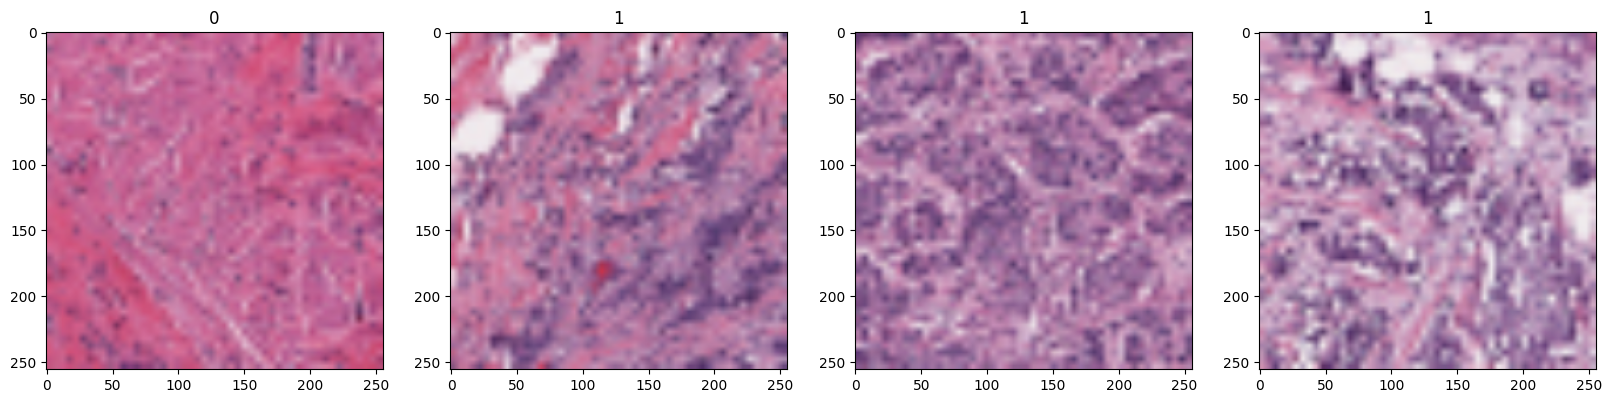

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

With the images "done" there's one thing that we have to pay attention, and is that the machines learn to much better if you pass their the input with small numbers like 0 and 1, he can understand better the situation, so to speak. This procces is called scalation and is a good practice to improve the performance of the machine lerning model. All we need to do is divide the numbers (which represent pixels) by 255. 

In [15]:
breast_data_scaled = dataset.map(lambda x,y: (x/255, y))

The same proccess to look the batches in our pipeline

In [16]:
bd_scaled = breast_data_scaled.as_numpy_iterator()
bd_batch = bd_scaled.next()

images scaled:

In [17]:
bd_batch

(array([[[[0.8509804 , 0.7137255 , 0.7921569 ],
          [0.8509804 , 0.7137255 , 0.7921569 ],
          [0.8509804 , 0.7137255 , 0.7921569 ],
          ...,
          [0.9019608 , 0.63529414, 0.7254902 ],
          [0.9019608 , 0.63529414, 0.7254902 ],
          [0.9019608 , 0.63529414, 0.7254902 ]],
 
         [[0.8509804 , 0.7137255 , 0.7921569 ],
          [0.8509804 , 0.7137255 , 0.7921569 ],
          [0.8509804 , 0.7137255 , 0.7921569 ],
          ...,
          [0.9019608 , 0.63529414, 0.7254902 ],
          [0.9019608 , 0.63529414, 0.7254902 ],
          [0.9019608 , 0.63529414, 0.7254902 ]],
 
         [[0.8509804 , 0.7137255 , 0.7921569 ],
          [0.8509804 , 0.7137255 , 0.7921569 ],
          [0.8509804 , 0.7137255 , 0.7921569 ],
          ...,
          [0.9019608 , 0.63529414, 0.7254902 ],
          [0.9019608 , 0.63529414, 0.7254902 ],
          [0.9019608 , 0.63529414, 0.7254902 ]],
 
         ...,
 
         [[0.9490196 , 0.93333334, 0.9490196 ],
          [0.94901

Review:

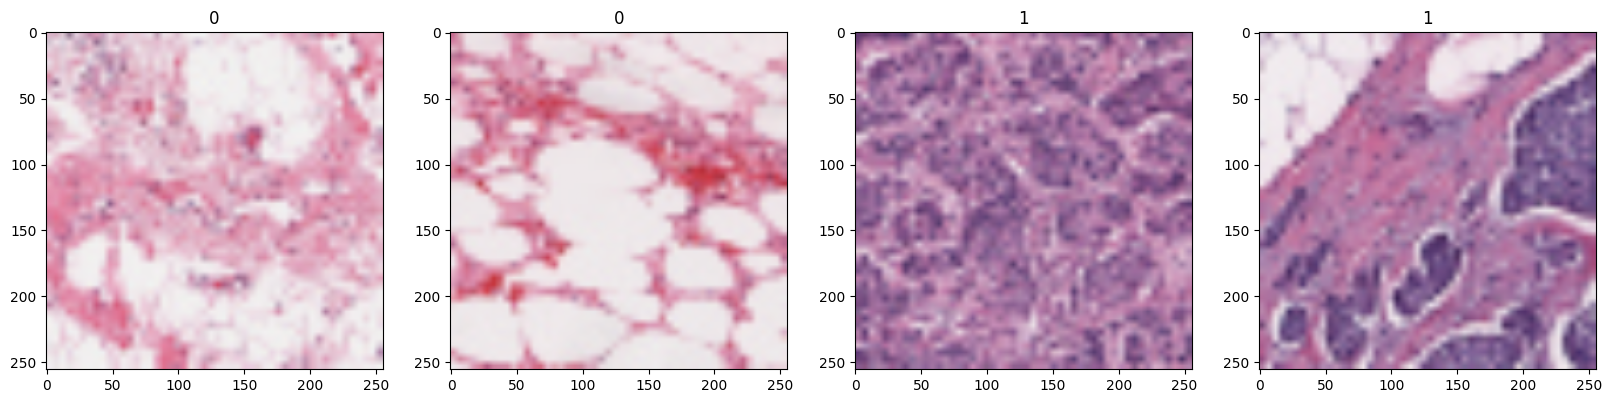

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(bd_batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(bd_batch[1][idx])

***
## Spliting the data

Now we got a data, but what with that? well, we need split it to assign what data we going to use to train the model and what to test the model.

In [19]:
print(f"Number of batches in the dataset pipelines: {len(data)}")

Number of batches in the dataset pipelines: 6


we take the percentages:

In [20]:
train_data = int(len(data)*.7)
val_data = int(len(data)*.2)
test_data = int(len(data)*.1)+1

print(f'Train Percentage: {train_data}\nValidation Percentage: {val_data}\nTest Percentage: {test_data}')

Train Percentage: 4
Validation Percentage: 1
Test Percentage: 1


and just... split it

In [21]:
train = breast_data_scaled.take(train_data)
val = breast_data_scaled.skip(train_data).take(val_data)
test = breast_data_scaled.skip(train_data+val_data).take(test_data)

***   
## Building the model

Let's do it the fun thing, the model

In [22]:
## Import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Define the model

In [39]:
model = Sequential()

Configure the layers of the neural network

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

All of this is called Structural decisions

In [41]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

***
## Training the model

Now with the model created we going to train it and adjust some hyperparameters to track the proccess and let it free without broke my computer

In [44]:
## Create a callback to adjust the model to stop when it consider the process enough to predict images
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [45]:
# The training :O
hist = model.fit(train, epochs=50, validation_data=val,callbacks=[early_stopping_callback])

Epoch 1/50


4/4 [==============================] - 6s 999ms/step - loss: 1.5230 - accuracy: 0.5859 - val_loss: 0.6198 - val_accuracy: 0.7188
Epoch 2/50
4/4 [==============================] - 4s 930ms/step - loss: 0.5880 - accuracy: 0.7031 - val_loss: 0.5531 - val_accuracy: 0.7812
Epoch 3/50
4/4 [==============================] - 4s 910ms/step - loss: 0.6063 - accuracy: 0.6797 - val_loss: 0.4548 - val_accuracy: 0.8438
Epoch 4/50
4/4 [==============================] - 4s 926ms/step - loss: 0.5079 - accuracy: 0.7422 - val_loss: 0.4917 - val_accuracy: 0.8125
Epoch 5/50
4/4 [==============================] - 4s 921ms/step - loss: 0.4891 - accuracy: 0.7422 - val_loss: 0.7227 - val_accuracy: 0.3438
Epoch 6/50
4/4 [==============================] - 4s 901ms/step - loss: 0.6061 - accuracy: 0.6328 - val_loss: 0.3342 - val_accuracy: 0.8125
Epoch 7/50
4/4 [==============================] - 4s 922ms/step - loss: 0.4928 - accuracy: 0.7500 - val_loss: 0.4734 - val_accuracy: 0.7812
Epoch 8/50
4/4 [===============

The rest is just to see how the training went

In [29]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

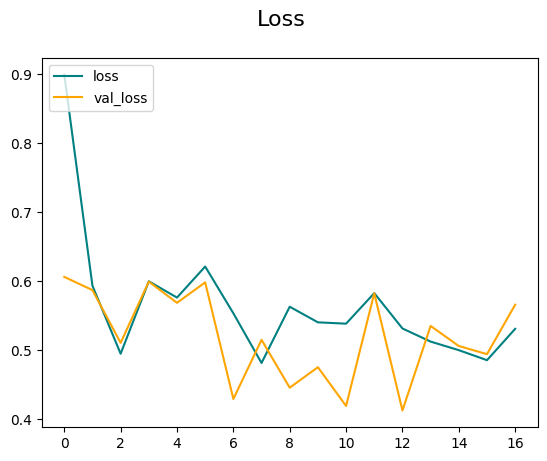

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=16)
plt.legend(loc='upper left')
plt.show()

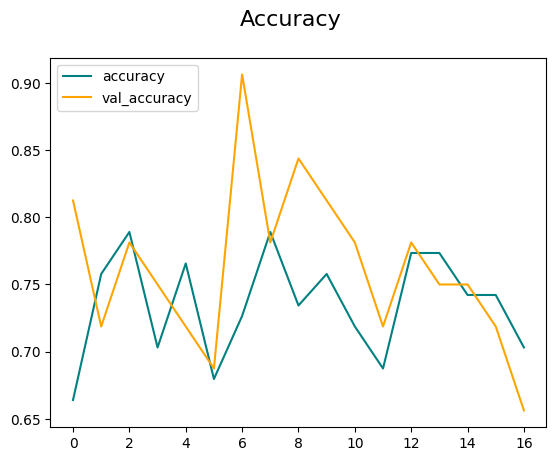

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=16)
plt.legend(loc='upper left')
plt.show()

***
## Testing the model

Now it's just prove it.

In [113]:
## image to prove the amazing model
test_image = test.as_numpy_iterator().next()

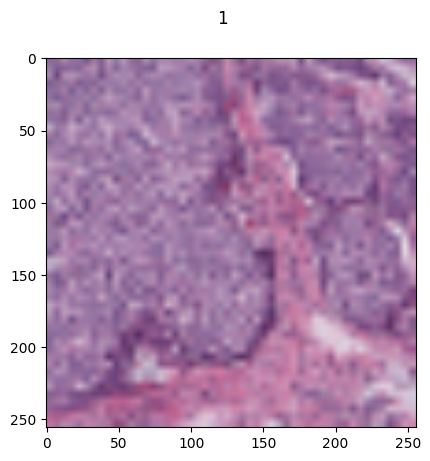

In [114]:
## Quick glance
plt.imshow(test_image[0][1])
plt.suptitle(test_image[1][1])
plt.show()

In [115]:
predict = model.predict(np.expand_dims(test_image[0][1],0))
print(predict)
if predict < .5:
  print("Your healthy ma'am")
else:
  print("You have breast cancer...")

1/1 [==============================] - 0s 48ms/step
[[0.8069837]]
You have breast cancer...
